In [1]:
import time 

import numpy as np
from pynq import pl
from pynq import Overlay
from pynq.lib.video import *
import cv2
import matplotlib.pyplot as plt

from pyzbar import pyzbar
#from sd_image_processing.sd_tpg import sd_tpgOverlay
overlay = Overlay("/usr/local/lib/python3.6/dist-packages/sd_image_processing/bitstream/sd_tpg.bit")


In [10]:
overlay?

In [2]:
from pynq import GPIO
gpio = GPIO.get_gpio_base()
gpio = gpio + 53
output =GPIO(gpio,'out')
output.write(1)

In [18]:
%%bash
i2cdetect -r -y 0

     0  1  2  3  4  5  6  7  8  9  a  b  c  d  e  f
00:          -- -- -- -- -- -- -- -- -- -- -- -- -- 
10: -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
20: -- -- -- -- -- -- -- -- -- -- -- -- UU -- -- -- 
30: -- -- -- -- 34 -- -- -- -- -- -- -- -- -- -- -- 
40: -- -- -- -- -- -- -- -- 48 -- -- -- -- -- -- -- 
50: -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
60: 60 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
70: -- -- -- -- -- -- -- --                         


In [3]:
!hostname

pynq


In [4]:
%%bash
chmod +rwx hdmi_config.elf
./hdmi_config.elf -m 1280x720

--------------------------------------------------------
Adiuvo Modified piSmasher HDMI Configuration Utility
Compiled: Mar  7 2020 12:00:42

Comparing 1280x720 and 1280x720
Mode found 1280x720 (4)
Initializing TDA1997x HDMI receiver
done.


In [5]:
pixel_in = overlay.pixel_pack_0
pixel_in.bits_per_pixel = 24

colourspace_in = overlay.color_convert_0
rgb2bgr = [0.0, 1.0, 0.0,
           1.0, 0.0, 0.0,
           0.0, 0.0, 1.0,
           0.0, 0.0, 0.0]

colourspace_in.colorspace = rgb2bgr



In [6]:
cam_vdma = overlay.axi_vdma_0
framemode = VideoMode(1280, 512, 24)
cam_vdma.readchannel.mode = framemode
cam_vdma.readchannel.start()

In [ ]:
tpg = overlay.v_tpg_0
tpg.write(0x10,720)
tpg.write(0x18,1280)
tpg.write(0x40,0)
tpg.write(0x30,0)
tpg.write(0x20,0xb)
tpg.write(0x00,0x81)

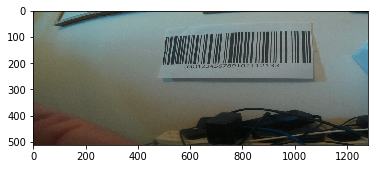

In [13]:
frame_camera = cam_vdma.readchannel.readframe()
frame_color=cv2.cvtColor(frame_camera,cv2.COLOR_BGR2RGB)
pixels = np.array(frame_color)
plt.imshow(pixels)
plt.show()

In [39]:
cam_vdma.readchannel.stop()

In [14]:
cv2.imwrite('img.jpg', frame_color) 

True

In [9]:
from pyzbar.pyzbar import decode

In [15]:
image = cv2.imread("img.jpg")
image =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray.jpg', image) 
ret,thresh1 = cv2.threshold(image,100,255,cv2.THRESH_BINARY)
blur = cv2.GaussianBlur(thresh1,(5,5),0)
cv2.imwrite('thres.jpg', blur) 
barcodes = decode(blur)


In [17]:
# loop over the detected barcodes
for barcode in barcodes:
    # extract the bounding box location of the barcode and draw the
    # bounding box surrounding the barcode on the image
    (x, y, w, h) = barcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    # the barcode data is a bytes object so if we want to draw it on
    # our output image we need to convert it to a string first
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
    # draw the barcode data and barcode type on the image
    text = "{} ({})".format(barcodeData, barcodeType)
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
        0.5, (0, 0, 255), 2)
    # print the barcode type and data to the terminal
    print("[INFO] Found {} barcode: {}".format(barcodeType, barcodeData))
# show the output image
#cv2.imshow("Image", image)
cv2.imwrite('final.jpg', image) 

[INFO] Found CODE128 barcode: 00123456789101112133


True

In [16]:
barcodes

[Decoded(data=b'00123456789101112133', type='CODE128', rect=Rect(left=502, top=97, width=549, height=99), polygon=[Point(x=502, y=195), Point(x=1051, y=196), Point(x=1051, y=194), Point(x=1050, y=160), Point(x=1049, y=136), Point(x=1048, y=116), Point(x=1047, y=98), Point(x=514, y=97), Point(x=512, y=111), Point(x=505, y=167)])]

In [28]:
from pyzbar import pyzbar